<a href="https://colab.research.google.com/github/DatNT146/Tuan13/blob/main/Money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Khai báo các thư viện
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing


In [ ]:
#Truy cập vào gg drive
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Truy cập vào tập dữ liệu 
training_set=train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Money/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 630 images belonging to 11 classes.


In [ ]:
validation=train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Money/Test',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 301 images belonging to 11 classes.


In [ ]:
training_set.class_indices

{'1000': 0,
 '10000': 1,
 '100000': 2,
 '200': 3,
 '2000': 4,
 '20000': 5,
 '200000': 6,
 '500': 7,
 '5000': 8,
 '50000': 9,
 '500000': 10}

In [ ]:
model=Sequential()
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 256 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(11,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 150, 150, 64)      1792      
                                                                 
 conv2d_19 (Conv2D)          (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 75, 75, 128)       73856     
                                                                 
 conv2d_21 (Conv2D)          (None, 75, 75, 128)       147584    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 37, 37, 128)      0         
 g2D)                                                 

In [ ]:
opt=SGD(lr=0.01,momentum=0.9)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(training_set,epochs=500,batch_size=200,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/500
20/20 [==============================] - 8s 389ms/step - loss: 2.8462 - accuracy: 0.0984 - val_loss: 2.3826 - val_accuracy: 0.0664
Epoch 2/500
20/20 [==============================] - 7s 375ms/step - loss: 2.3791 - accuracy: 0.1508 - val_loss: 2.3717 - val_accuracy: 0.1296
Epoch 3/500
20/20 [==============================] - 7s 368ms/step - loss: 2.3580 - accuracy: 0.1429 - val_loss: 2.3252 - val_accuracy: 0.1329
Epoch 4/500
20/20 [==============================] - 9s 447ms/step - loss: 2.2700 - accuracy: 0.1746 - val_loss: 2.1372 - val_accuracy: 0.3322
Epoch 5/500
20/20 [==============================] - 7s 369ms/step - loss: 2.2519 - accuracy: 0.2238 - val_loss: 2.3214 - val_accuracy: 0.2458
Epoch 6/500
20/20 [==============================] - 7s 372ms/step - loss: 2.2586 - accuracy: 0.2222 - val_loss: 2.2491 - val_accuracy: 0.2027
Epoch 7/500
20/20 [==============================] - 8s 379ms/step - loss: 2.0714 - accuracy: 0.2889 - val_loss: 1.7512 - val_accuracy: 0.4452

In [ ]:
# Đánh giá độ chính xác của mô hình sau khi đã train 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.028187911957502365
Train Accuracy 0.9936507940292358


<function matplotlib.pyplot.show>

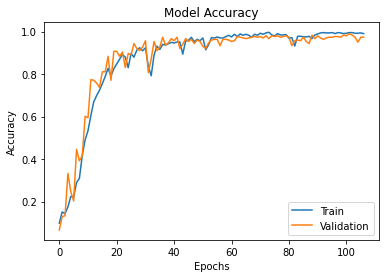

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
# Lưu lại
model.save("Bai3.h5")
model_CNN=load_model('Bai3.h5')

100000


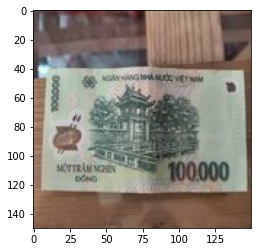

In [ ]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/Money/Predict/1tram.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1000'
if round(result[0][1])==1:
  prediction='10000'
if round(result[0][2])==1:
  prediction='100000'
if round(result[0][3])==1:
  prediction='200'
if round(result[0][4])==1:
  prediction='2000'
if round(result[0][5])==1:
  prediction='20000'
if round(result[0][6])==1:
  prediction='200000'
if round(result[0][7])==1:
  prediction='500'
if round(result[0][8])==1:
  prediction='5000'
if round(result[0][9])==1:
  prediction='50000'
if round(result[0][10])==1:
  prediction='500000'
print(prediction)

1000


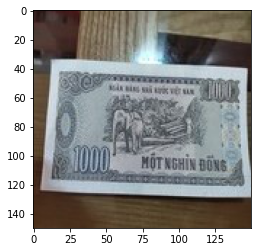

In [ ]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/Money/Predict/1ngan.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1000'
if round(result[0][1])==1:
  prediction='10000'
if round(result[0][2])==1:
  prediction='100000'
if round(result[0][3])==1:
  prediction='200'
if round(result[0][4])==1:
  prediction='2000'
if round(result[0][5])==1:
  prediction='20000'
if round(result[0][6])==1:
  prediction='200000'
if round(result[0][7])==1:
  prediction='500'
if round(result[0][8])==1:
  prediction='5000'
if round(result[0][9])==1:
  prediction='50000'
if round(result[0][10])==1:
  prediction='500000'
print(prediction)

20000


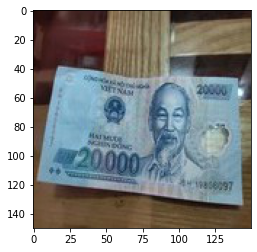

In [ ]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/Money/Predict/2chuc.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1000'
if round(result[0][1])==1:
  prediction='10000'
if round(result[0][2])==1:
  prediction='100000'
if round(result[0][3])==1:
  prediction='200'
if round(result[0][4])==1:
  prediction='2000'
if round(result[0][5])==1:
  prediction='20000'
if round(result[0][6])==1:
  prediction='200000'
if round(result[0][7])==1:
  prediction='500'
if round(result[0][8])==1:
  prediction='5000'
if round(result[0][9])==1:
  prediction='50000'
if round(result[0][10])==1:
  prediction='500000'
print(prediction)

50000


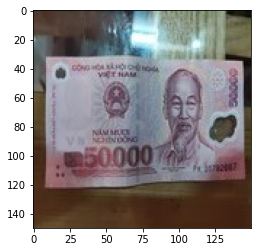

In [ ]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/Money/Predict/5chuc.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1000'
if round(result[0][1])==1:
  prediction='10000'
if round(result[0][2])==1:
  prediction='100000'
if round(result[0][3])==1:
  prediction='200'
if round(result[0][4])==1:
  prediction='2000'
if round(result[0][5])==1:
  prediction='20000'
if round(result[0][6])==1:
  prediction='200000'
if round(result[0][7])==1:
  prediction='500'
if round(result[0][8])==1:
  prediction='5000'
if round(result[0][9])==1:
  prediction='50000'
if round(result[0][10])==1:
  prediction='500000'
print(prediction)

5000


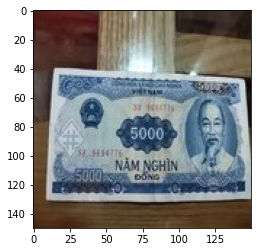

In [ ]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/Money/Predict/5ngan.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1000'
if round(result[0][1])==1:
  prediction='10000'
if round(result[0][2])==1:
  prediction='100000'
if round(result[0][3])==1:
  prediction='200'
if round(result[0][4])==1:
  prediction='2000'
if round(result[0][5])==1:
  prediction='20000'
if round(result[0][6])==1:
  prediction='200000'
if round(result[0][7])==1:
  prediction='500'
if round(result[0][8])==1:
  prediction='5000'
if round(result[0][9])==1:
  prediction='50000'
if round(result[0][10])==1:
  prediction='500000'
print(prediction)

500000


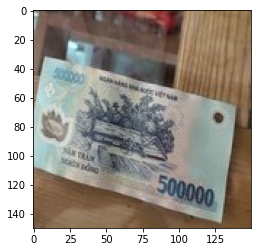

In [ ]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/Money/Predict/5tram.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1000'
if round(result[0][1])==1:
  prediction='10000'
if round(result[0][2])==1:
  prediction='100000'
if round(result[0][3])==1:
  prediction='200'
if round(result[0][4])==1:
  prediction='2000'
if round(result[0][5])==1:
  prediction='20000'
if round(result[0][6])==1:
  prediction='200000'
if round(result[0][7])==1:
  prediction='500'
if round(result[0][8])==1:
  prediction='5000'
if round(result[0][9])==1:
  prediction='50000'
if round(result[0][10])==1:
  prediction='500000'
print(prediction)

10000


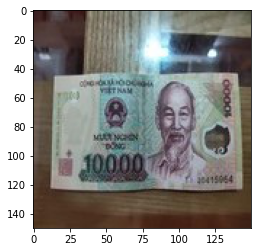

In [ ]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/Money/Predict/10ngan.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1000'
if round(result[0][1])==1:
  prediction='10000'
if round(result[0][2])==1:
  prediction='100000'
if round(result[0][3])==1:
  prediction='200'
if round(result[0][4])==1:
  prediction='2000'
if round(result[0][5])==1:
  prediction='20000'
if round(result[0][6])==1:
  prediction='200000'
if round(result[0][7])==1:
  prediction='500'
if round(result[0][8])==1:
  prediction='5000'
if round(result[0][9])==1:
  prediction='50000'
if round(result[0][10])==1:
  prediction='500000'
print(prediction)

200000


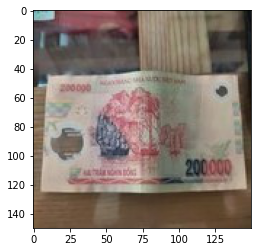

In [ ]:
img=load_img("/content/drive/MyDrive/Colab Notebooks/Money/Predict/2tram.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='1000'
if round(result[0][1])==1:
  prediction='10000'
if round(result[0][2])==1:
  prediction='100000'
if round(result[0][3])==1:
  prediction='200'
if round(result[0][4])==1:
  prediction='2000'
if round(result[0][5])==1:
  prediction='20000'
if round(result[0][6])==1:
  prediction='200000'
if round(result[0][7])==1:
  prediction='500'
if round(result[0][8])==1:
  prediction='5000'
if round(result[0][9])==1:
  prediction='50000'
if round(result[0][10])==1:
  prediction='500000'
print(prediction)